In [40]:
import numpy as np
import subprocess
from mpl_toolkits import mplot3d
import ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tabulate import tabulate
from tqdm import tqdm

Lets draw time (N) for square matrix

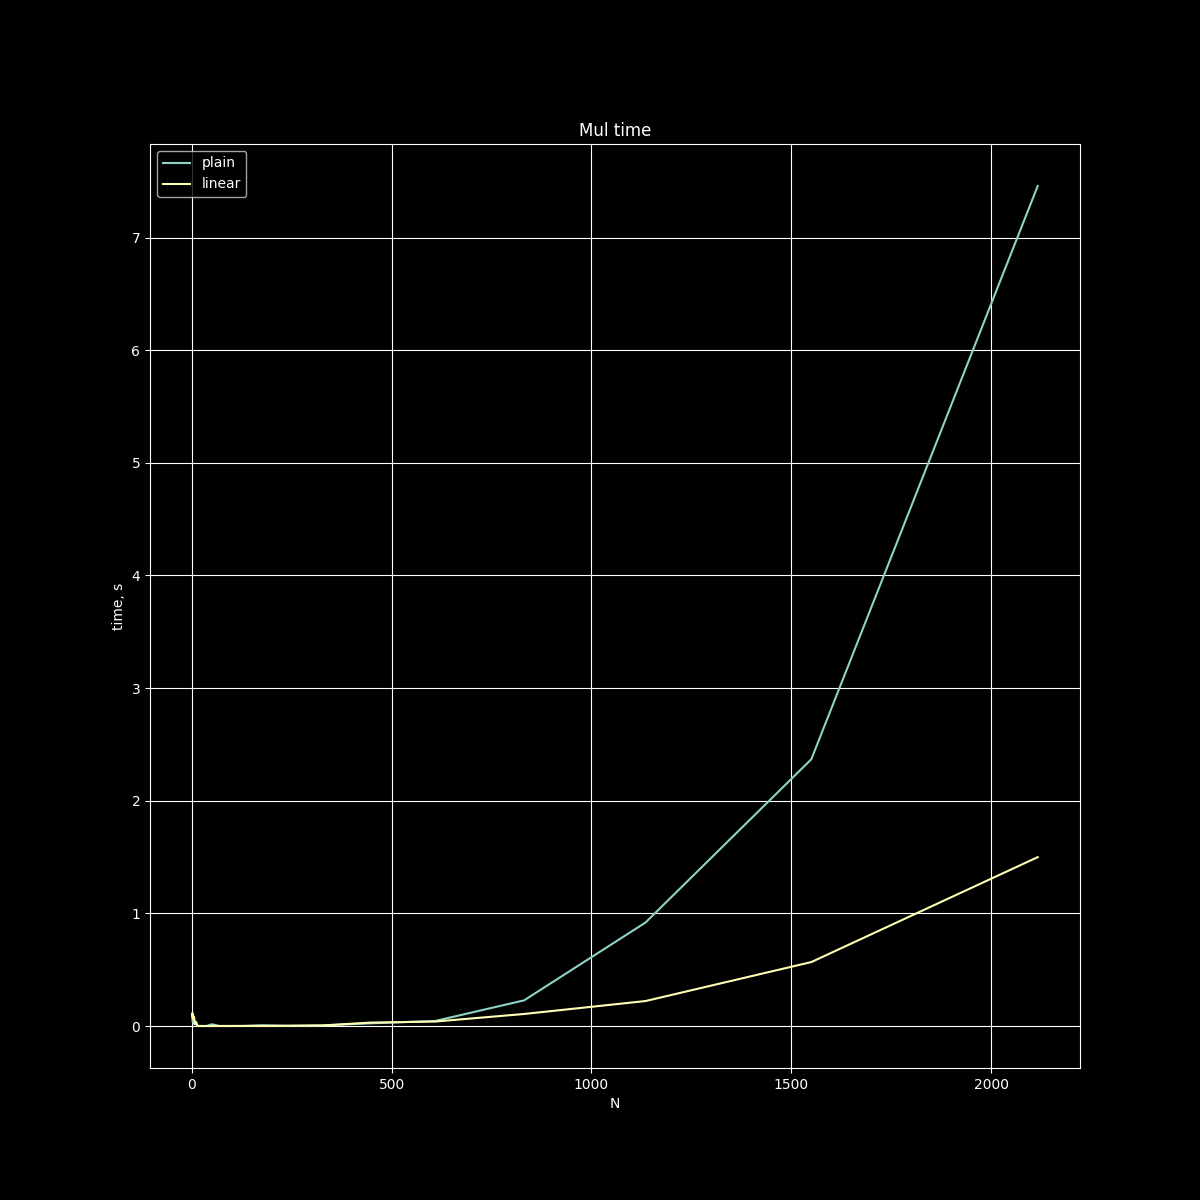

In [41]:
num_points = 25
num_algos = 2
algos = []
algos.append ("plain")
algos.append ("linear")

Ns = np.logspace (1, 42, base = 1.2, num = num_points)
times = np.zeros ((num_algos, num_points))

for i in range(0, num_points):
    result = subprocess.run (["./matmul_test", "{0}".format (Ns[i]), "{0}".format (Ns[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(12, 12))
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("N")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (Ns, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()